# THE SPARKS FOUNDATION 

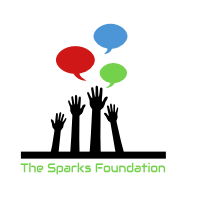

## Task #2 - To Explore Supervised Machine Learning

## Problem Statement: To predict the percentage of marks that a student is expected to score based upon the number of hours studied

## Importing required libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading Dataset from url

In [52]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [53]:
df.shape

(25, 2)

In [54]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Plotting the distribution of scores

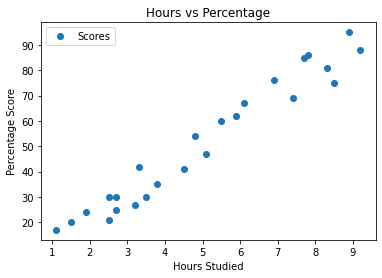

In [55]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Preparing the data

In [56]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  
X
y


array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Splitting the data into training and test sets

In [57]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Training the Algorithm

In [58]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


## Plotting the regression line

In [59]:
line = regressor.coef_*X+regressor.intercept_

## Plotting for the test data

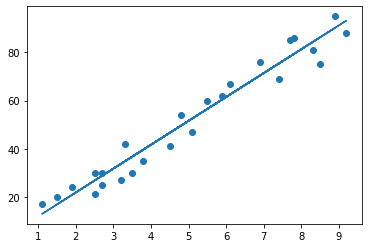

In [60]:
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Making Predictions

In [61]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Text(0, 0.5, 'scored percentage')

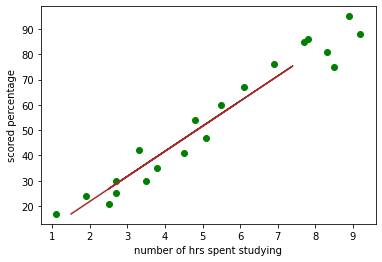

In [62]:
plt.scatter(X_train,y_train,color='green')
plt.plot(X_test,y_pred,color="brown")
plt.xlabel("number of hrs spent studying")
plt.ylabel("scored percentage")

## Comparing Actual vs Predicted

In [63]:
df_new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_new 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Prediction if a student studies for 9.5 hours

In [64]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))
print("Therefore if a student studies for 9.5 hours, his predicted score would be",own_pred)

No of Hours = 9.25
Predicted Score = 93.69173248737535
Therefore if a student studies for 9.5 hours, his predicted score would be [93.69173249]


## Evaluating the model

In [65]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Absolute Percentage Error', np.mean(abs(y_pred-y_test)/y_test))
print('Mean Square Error :' ,metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Absolute Percentage Error 0.12568891617045658
Mean Square Error : 21.598769307217406
Root Mean Square Error: 4.647447612100367
